## Rough outline brainstorm

### Reading in data
* briefly address encoding issues. I believe pandas default to ASCII? (-- it's acutally UTF-8)
### basic manipulations
* Subsetting
* Accessing rows/columns/individual items
* changing column headers
* creating calculated values
* using lambda functions (or functions in general) to manipulate the data
### more advanced manipulations
* group by
* melting
* merging
### miscellanous thoughts
* TBD


In [4]:
# Import the packages we will use
import pandas as pd
import numpy as np
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Lesson 1 : Demonstration

This first example follows Chapter 4, section 3 of Richard McElreath's book _[Statistical Rethinking](http://xcelab.net/rm/statistical-rethinking/)_.

The task is understand height in a population, in this case using data about the !Kung San people. Anthropologist Nancy Howell conducted interviews with the !Kung San and collected the data used here.

The data are available in the github repository for the book: https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv

In [5]:
# Read some data into a frame
# A frame is like an table in a spreadsheet. 
# It contains columns (which usually have names) and rows (which can be indexed by number, 
# but may also have names)
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=";")
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


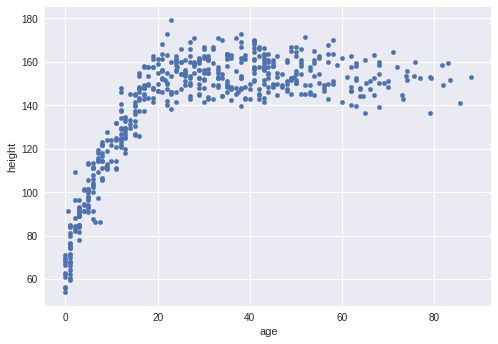

In [6]:
# Graph the data -- let's look at height vs. age
df.plot.scatter(x='age', y='height')

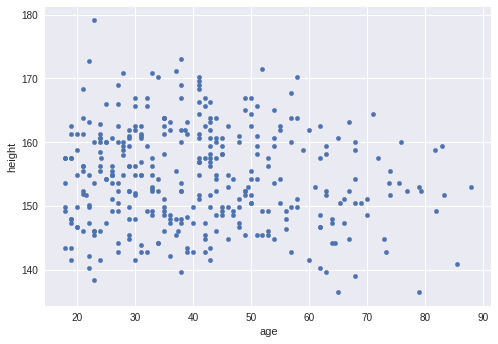

In [7]:
# Filter to adults, since height and age are correlated in children
adults_df = df[df['age'] >= 18]
# Look at height vs. age again
adults_df.plot.scatter(x='age', y='height')

In [8]:
# Print out how many rows are in each frame
len(df), len(adults_df)

(544, 352)

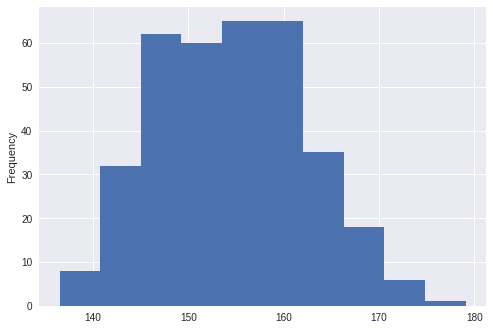

In [9]:
# Let's look at how the data are distributed
adults_df['height'].plot.hist()

In [10]:
# Split data in to male and female
# -- first add in a sex column to make it less confusing
df['sex'] = df.apply(lambda row: 'Male' if row['male'] == 1 else 'Female', axis=1)
# -- re-apply the filter, since we modified the data
adults_df = df[df['age'] >= 18]
adults_df.head()

,height,weight,age,male,sex
0,151.765,47.825606,63.0,1,Male
1,139.700,36.485807,63.0,0,Female
2,136.525,31.864838,65.0,0,Female
3,156.845,53.041915,41.0,1,Male
4,145.415,41.276872,51.0,0,Female


In [11]:
# Let's summarize the data
adults_df[['age', 'height', 'weight']].describe()

,age,height,weight
count,352.000000,352.000000,352.000000
mean,41.138494,154.597093,44.990486
std,15.967855,7.742332,6.456708
min,18.000000,136.525000,31.071052
25%,28.000000,148.590000,40.256290
50%,39.000000,154.305000,44.792210
75%,51.000000,160.655000,49.292693
max,88.000000,179.070000,62.992589


In [12]:
# Let's look at the data broken down by sex
adults_df[['age', 'height', 'weight', 'sex']].groupby('sex').describe()

age      height      weight
sex                                             
Female count  187.000000  187.000000  187.000000
       mean    40.712299  149.513519   41.814190
       std     16.219897    5.084577    5.387917
       min     18.000000  136.525000   31.071052
       25%     27.000000  146.050000   37.931631
       50%     38.000000  149.860000   41.645416
       75%     51.000000  153.035000   45.146579
       max     85.600000  162.560000   56.755699
Male   count  165.000000  165.000000  165.000000
       mean    41.621515  160.358476   48.590287
       std     15.712552    6.009177    5.635564
       min     18.000000  139.700000   31.524644
       25%     29.000000  157.480000   45.217453
       50%     41.000000  160.655000   48.420946
       75%     50.000000  163.830000   52.219779
       max     88.000000  179.070000   62.992589

In [13]:
# Let's focus on the means and std
summary_df = adults_df[['age', 'height', 'weight', 'sex']].groupby('sex').describe()
summary_df.loc[(slice(None),['mean', 'std']), :]

age      height     weight
sex                                          
Female mean  40.712299  149.513519  41.814190
       std   16.219897    5.084577   5.387917
Male   mean  41.621515  160.358476  48.590287
       std   15.712552    6.009177   5.635564

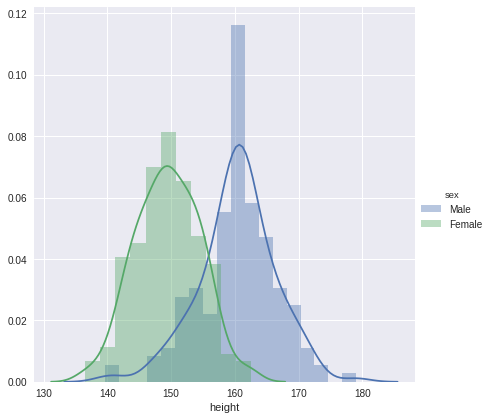

In [14]:
# Let's look at this visually -- plot height broken down by sex
g = sns.FacetGrid(adults_df, hue='sex', size=6)
g.map(sns.distplot, "height")
g.add_legend()

In [15]:
# Actually, let's look at everything
# -- first, get rid of the male column, it's redundant and confusing
del adults_df['male']
adults_df.head()

,height,weight,age,sex
0,151.765,47.825606,63.0,Male
1,139.700,36.485807,63.0,Female
2,136.525,31.864838,65.0,Female
3,156.845,53.041915,41.0,Male
4,145.415,41.276872,51.0,Female


In [16]:
# -- now flatten the data -- very confusing, it will be explained later
flat_df = adults_df.set_index('sex', append=True)
flat_df = flat_df.stack().reset_index([1, 2])
flat_df.columns = ['sex', 'measurement', 'value']
flat_df.head()

,sex,measurement,value
0,Male,height,151.765000
0,Male,weight,47.825606
0,Male,age,63.000000
1,Female,height,139.700000
1,Female,weight,36.485807


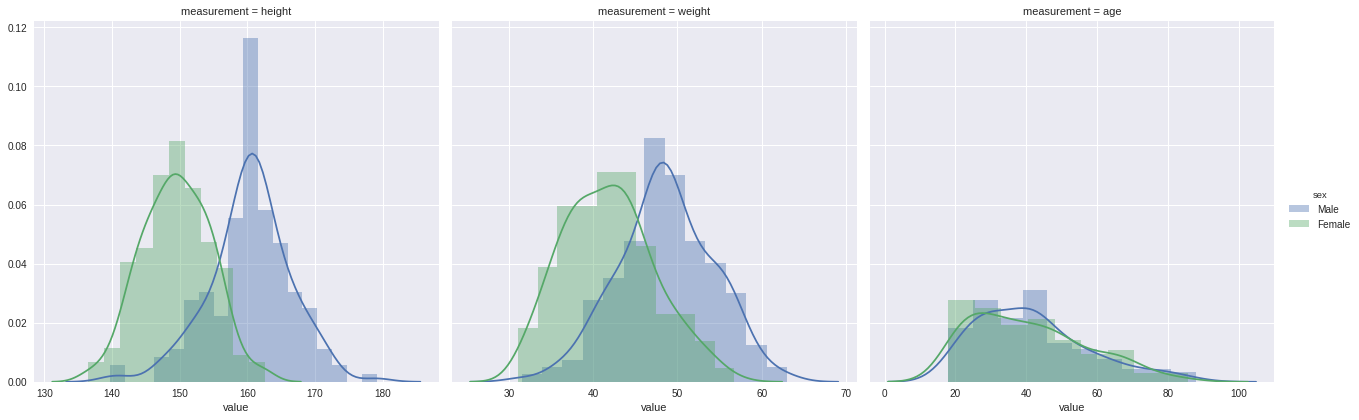

In [17]:
# Plot!
g = sns.FacetGrid(flat_df, col='measurement', hue='sex', size=6, sharex=False)
g.map(sns.distplot, "value")
g.add_legend()

# Lesson 2: Details

What just happened!? Let's take a deeper look at what was done above.

## Reading in data

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=";")
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


One central abstraction in pandas is the DataFrame, which is similar to a data frame in R &mdash; that is, basically a spreadsheet. It is made up of columns, which are usually names, and rows, which may be named or just accessed by index.

Pandas is designed to be fast and efficient, so the table isn't necessarily stored the way you think it is internally. In particular, data is stored in columns, and each column is a pandas Series, which itself builds on numpy arrays, not native Python arrays.

Pandas can read data in many formats. CSV and JSON are common ones to use. You can control many aspects about how the data is read. Above, you see that the structure of the file is csv-like, but instead the ';' is used as the column separator. This is not a problem. Pandas can also handle different file encodings (UTF-8 is the default), etc. 

## Basic frame manipulations — Accessing columns, rows, elements

In [19]:
df['height'].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

In many cases, columns of a frame can be accessed like an array. The result is a pandas Series object, which, as you see, has a name, index, and type.

### Aside — why all the calls to 'head()'?

Series and frames can be very large. The methods head() and tail() can be used get a few of the first and last rows, respectively. By default, first/last 5 rows are returned. It's used here to limit output to a small number of rows, since there is no need to see the whole table.

In [20]:
df.loc[0]

height    151.765000
weight     47.825606
age        63.000000
male        1.000000
Name: 0, dtype: float64

Rows are accessed using the method loc or iloc. The method 'loc' takes the index, 'iloc' takes the row index. In the above case, these are the same, but that is not always true. For example...

In [21]:
summary_df = df.describe()
summary_df.loc['mean']

height    138.263596
weight     35.610618
age        29.344393
male        0.472426
Name: mean, dtype: float64

To access an individual cell, specify a row and column using loc.

In [22]:
summary_df.loc['mean', 'age']

29.344393382352944

### Another aside -- loc vs. iloc

As you saw above, the method `loc` takes the "label" of the index. The method `iloc` takes the index as arguments, with the parameters [row-index, col-index]

In [27]:
# select row index 0, and all the columns in that row
df.iloc[0,:]

height    151.765000
weight     47.825606
age        63.000000
male        1.000000
Name: 0, dtype: float64

In [30]:
# select all the rows in column 0 by index
df.iloc[:,0]

0      151.7650
1      139.7000
2      136.5250
3      156.8450
4      145.4150
5      163.8300
6      149.2250
7      168.9100
8      147.9550
9      165.1000
10     154.3050
11     151.1300
12     144.7800
13     149.9000
14     150.4950
15     163.1950
16     157.4800
17     143.9418
18     121.9200
19     105.4100
20      86.3600
21     161.2900
22     156.2100
23     129.5400
24     109.2200
25     146.4000
26     148.5900
27     147.3200
28     137.1600
29     125.7300
         ...   
514    151.7650
515    148.5900
516    153.6700
517     53.9750
518    146.6850
519     56.5150
520    100.9650
521    121.9200
522     81.5848
523    154.9400
524    156.2100
525    132.7150
526    125.0950
527    101.6000
528    160.6550
529    146.0500
530    132.7150
531     87.6300
532    156.2100
533    152.4000
534    162.5600
535    114.9350
536     67.9450
537    142.8750
538     76.8350
539    145.4150
540    162.5600
541    156.2100
542     71.1200
543    158.7500
Name: height, dtype: flo

## Basic frame manipulations — data subsetting

In [19]:
df[['age', 'height', 'weight']].head()

,age,height,weight
0,63.0,151.765,47.825606
1,63.0,139.700,36.485807
2,65.0,136.525,31.864838
3,41.0,156.845,53.041915
4,51.0,145.415,41.276872


Specifiying an array of column names returns a frame containing just those columns.

In [21]:
df.iloc[0:5]

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


It's also possible to access a subset of the rows by index. More commonly, though, you will want to subset the data by some property.

In [22]:
df[df['age'] >= 18].head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


This is intiutive to understand, but may seem a little magical at first. It is worth understanding what is going on underneath the covers.

The expression

    df['age'] >= 18 

returns an series of bool indicating whether the expression is true or false for that row (identified by index).

In [23]:
(df['age'] >= 18).head()

0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool

In [24]:
(df['male'] == 0).head()

0    False
1     True
2     True
3    False
4     True
Name: male, dtype: bool

When such a series is the argument to the indexing operator, `[]`, pandas returns a frame containing the rows where the value is True. These kinds of expressions can be combined as well, using the bitwise operators (not `and`/`or`).

In [29]:
((df['age'] >= 18) & (df['male'] == 0)).head()

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [30]:
df[(df['age'] >= 18) & (df['male'] == 0)].head()

,height,weight,age,male
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
4,145.415,41.276872,51.0,0
6,149.225,38.243476,32.0,0
8,147.955,34.869885,19.0,0


This way, code for subsetting is intuitive to understand. It is also possible to subset rows and columns simultaneously.

In [31]:
df.loc[(df['age'] >= 18) & (df['male'] == 0), ['height', 'weight', 'age']].head()

,height,weight,age
1,139.700,36.485807,63.0
2,136.525,31.864838,65.0
4,145.415,41.276872,51.0
6,149.225,38.243476,32.0
8,147.955,34.869885,19.0


## Basic frame manipulations — renaming columns

Renaming columns: just feed a list of new columns and pass it to `df.columns`

In [36]:
df.columns = ['new_height', 'new_weight', 'new_age', 'coded_gender']

## Creating columns based on other columns

If I wanted to create a new column based on adding up the weight and age, I could do this:

In [39]:
df['new_id'] = df['new_weight'] + df['new_age']
df.head(2)

,new_height,new_weight,new_age,coded_gender,new_id
0,151.765,47.825606,63.0,1,110.825606
1,139.700,36.485807,63.0,0,99.485806


If I wanted to create a calculated column using a dictionary replacement, I could use the `map` function

In [40]:
gender_text = {1: 'Male', 0: 'Female'}
df['text_gender'] = df['coded_gender'].map(gender_text)
df.head(2)

,new_height,new_weight,new_age,coded_gender,new_id,text_gender
0,151.765,47.825606,63.0,1,110.825606,Male
1,139.700,36.485807,63.0,0,99.485806,Female


What about using a lambda function to create a new column?

In [41]:
df['double_age'] = df['new_age'].apply(lambda x: x*2)

In [42]:
df.head(2)

,new_height,new_weight,new_age,coded_gender,new_id,text_gender,double_age
0,151.765,47.825606,63.0,1,110.825606,Male,126.0
1,139.700,36.485807,63.0,0,99.485806,Female,126.0
